## Main Project Notebook



In [12]:
import pandas as pd 
file_path='/Users/home/Desktop/Ironhack/Group Assignment/Project-1111/Apple Stock Data 80-22.csv'
apple_data = pd.read_csv(file_path,delimiter=';')
print(apple_data)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100323   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095089   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088110   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090291   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092908   
...           ...         ...         ...         ...         ...         ...   
10404  2022-03-18  160.509995  164.479996  159.759995  163.979996  163.979996   
10405  2022-03-21  163.509995  166.350006  163.009995  165.380005  165.380005   
10406  2022-03-22  165.509995  169.419998  164.910004  168.820007  168.820007   
10407  2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
10408  2022-03-24  171.059998  174.139999  170.210007  174.070007  174.070007   

          Volume  
0      4

In [30]:
file_path_gdp='/Users/home/Desktop/Ironhack/Group Assignment/Project-1111/API_NY/global_gdp_growth_rate.csv'

global_gdp_data = pd.read_csv(file_path_gdp,skiprows=3)  # Try using a semicolon if the file uses it

global_gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.623626,1.719625,7.048533,2.397085,-2.232440,-26.211821,24.132627,8.517918,4.263719,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.468736,7.869709,5.622374,4.690458,5.159574,...,3.004937,2.194761,2.684543,2.666632,2.194319,-2.864293,4.576393,3.553878,2.320138,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.710887,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.873054,3.712777,7.111968,5.413943,4.120855,...,2.720365,0.160782,2.289810,2.844755,3.232903,-1.003994,4.037630,3.789680,3.354733,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.943572,-2.580050,-0.147213,-1.316362,-0.702273,-5.638215,1.199211,3.044727,1.001289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.916231,5.571775,4.825656,3.406632,4.756801,-5.340275,10.745656,4.278499,4.067627,NaN
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,1.321862,0.664552,1.157947,1.556784,0.259936,-6.168918,4.955033,1.911480,0.698485,NaN
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,2.920375,3.755100,3.525863,4.034494,1.441306,-2.785055,6.234922,5.211224,5.367943,NaN


In [32]:
#US_gdp_data=global_gdp_data[global_gdp_data['Data Source']=='United States']
global_gdp_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [62]:
us_gdp_data = global_gdp_data[global_gdp_data['Country Name'] == 'United States']
us_gdp_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 68'],inplace=True)
us_gdp_data.fillna('NA')

/var/folders/hv/sgj9c8cn0ql8vfb3lx01lzbr0000gn/T/ipykernel_52511/1729231860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_gdp_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 68'],inplace=True)


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
251,United States,NA,2.3,6.1,4.4,5.8,6.4,6.5,2.5,4.8,...,2.52382,2.94555,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556


In [66]:
us_gdp=pd.melt(us_gdp_data,
               id_vars=['Country Name'],
               var_name='Year',
               value_name='GDP Growth Rate')
us_gdp

,Country Name,Year,GDP Growth Rate
0,United States,1960,NaN
1,United States,1961,2.300000
2,United States,1962,6.100000
3,United States,1963,4.400000
4,United States,1964,5.800000
...,...,...,...
59,United States,2019,2.583825
60,United States,2020,-2.163029
61,United States,2021,6.055053
62,United States,2022,2.512375


In [96]:
us_gdp['Year']=pd.to_numeric(us_gdp['Year'],errors='coerce')
us_gdp_filtered=us_gdp[(us_gdp['Year']>=1980) & (us_gdp['Year']<=2022)]
us_gdp_filtered.drop(columns=['Country Name'])

,Year,GDP Growth Rate
20,1980,-0.256776
21,1981,2.537701
22,1982,-1.803014
23,1983,4.583791
24,1984,7.236453
25,1985,4.169575
26,1986,3.462655
27,1987,3.454630
28,1988,4.176982
29,1989,3.672238


In [90]:
us_gdp_filtered.describe()

,Year,GDP Growth Rate
count,43.000000,43.000000
mean,2001.000000,2.628949
std,12.556539,1.968714
min,1980.000000,-2.576500
25%,1990.500000,1.944912
50%,2001.000000,2.751796
75%,2011.500000,3.810272
max,2022.000000,7.236453


In [42]:
#Calculate average yearly stock prices
apple_data['Date']=pd.to_datetime(apple_data['Date'])

#dt. to extract time; 
apple_data['Year']=apple_data['Date'].dt.year

apple_data['Year']

0        1980
1        1980
2        1980
3        1980
4        1980
         ... 
10404    2022
10405    2022
10406    2022
10407    2022
10408    2022
Name: Year, Length: 10409, dtype: int32

In [48]:
annual_mean=apple_data.groupby('Year')[['High','Low','Close']].mean().reset_index()
annual_mean

,Year,High,Low,Close
0,1980,0.136461,0.135903,0.135903
1,1981,0.109265,0.108548,0.108548
2,1982,0.086665,0.084630,0.085459
3,1983,0.171085,0.163449,0.167274
4,1984,0.122294,0.117642,0.119651
5,1985,0.092023,0.089937,0.090233
6,1986,0.147048,0.142207,0.144913
7,1987,0.355806,0.339820,0.347751
8,1988,0.376663,0.365092,0.370884
9,1989,0.377679,0.365881,0.371953


In [88]:
annual_mean.describe()

,Year,High,Low,Close
count,43.000000,43.000000,43.000000,43.000000
mean,2001.000000,16.613342,16.242356,16.435466
std,12.556539,36.575862,35.706042,36.160941
min,1980.000000,0.086665,0.084630,0.085459
25%,1990.500000,0.323207,0.311728,0.317724
50%,2001.000000,0.496445,0.481831,0.489309
75%,2011.500000,15.090402,14.795443,14.939986
max,2022.000000,169.582456,165.126842,167.447018


<Axes: xlabel='Year', ylabel='High'>

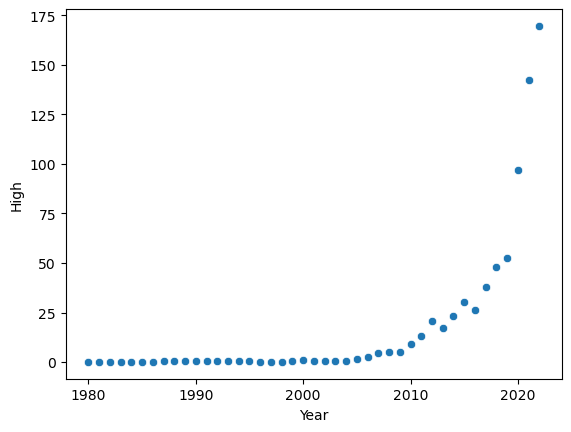

In [52]:
import seaborn as sns
sns.scatterplot(x='Year',y='High',data=annual_mean)

<Axes: xlabel='Year', ylabel='Low'>

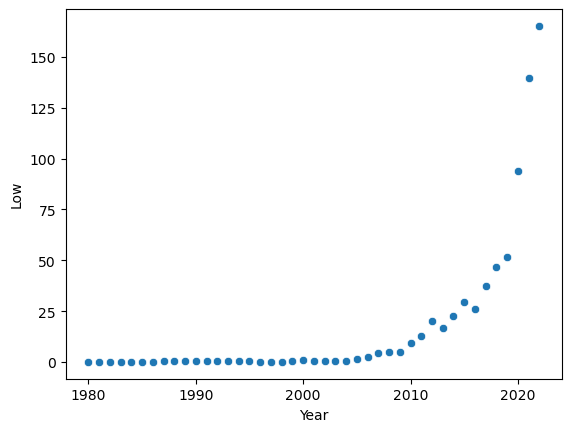

In [54]:
sns.scatterplot(x='Year',y='Low',data=annual_mean)

<Axes: xlabel='Year', ylabel='GDP Growth Rate'>

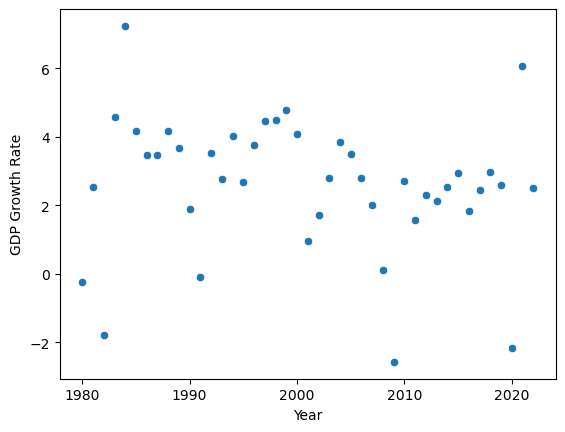

In [78]:
sns.scatterplot(x='Year',y='GDP Growth Rate',data=us_gdp_filtered)

In [82]:
#Annual Return is change in stock price year over year;
annual_avg['Annual Return'] = annual_avg['Close'].pct_change() * 100
annual_avg['Annual Return']


0            NaN
1     -20.128506
2     -21.270752
3      95.736252
4     -28.469911
5     -24.586255
6      60.597642
7     139.972578
8       6.652209
9       0.288157
10     -9.834594
11     39.755320
12      4.396828
13    -25.137431
14    -16.930780
15     18.954051
16    -38.531416
17    -27.900664
18     70.118718
19     89.008642
20     58.254099
21    -55.767638
22     -5.341354
23     -3.107114
24     91.574012
25    162.764119
26     51.706634
27     81.150615
28     10.684253
29      3.405513
30     76.987370
31     40.086545
32     58.253537
33    -17.952416
34     36.649368
35     30.103994
36    -12.859040
37     43.924768
38     25.574278
39     10.157195
40     83.134405
41     47.869628
42     18.765708
Name: Annual Return, dtype: float64

In [86]:
merged_data = pd.merge(annual_avg, us_gdp_filtered, on='Year', how='inner')
correlation = merged_data['Annual Return'].corr(merged_data['GDP Growth Rate'])
print("Correlation between Annual Return and GDP Growth Rate:", correlation)


Correlation between Annual Return and GDP Growth Rate: 0.10117937820334706
